# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## 1. sales_channel

In [8]:
# Count the occurrences of each unique value in the 'sales_channel' column
channel_counts = df['sales_channel'].value_counts()

# Calculate the percentage
channel_percentage = (channel_counts / df.shape[0]) * 100

# Convert percentage values to strings and append "%" symbol
channel_percentage_with_symbol = channel_percentage.apply(lambda x: f"{x:.2f}%")

# Create a DataFrame to display results
result_df = pd.DataFrame({'Count': channel_counts, 'Percentage': channel_percentage_with_symbol})

# Display the result DataFrame
print(result_df)

               Count Percentage
sales_channel                  
Internet       44382     88.76%
Mobile          5618     11.24%


## 2. trip_type

In [9]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


## 3. purchase_lead

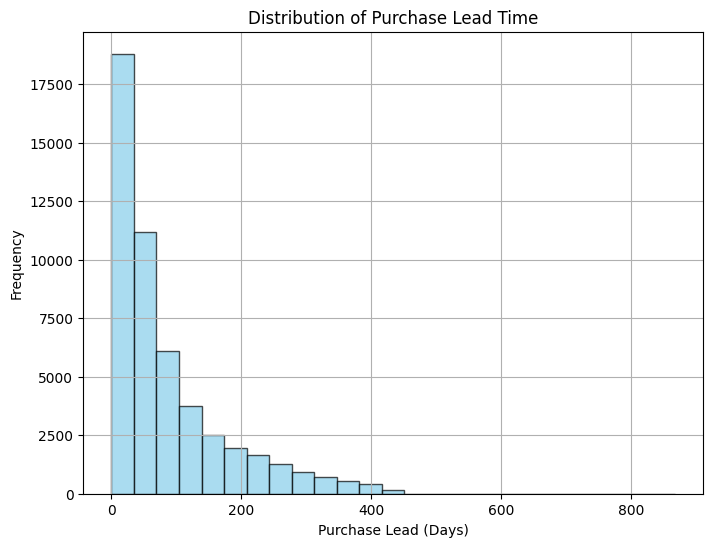

In [10]:
# Create a histogram to visualize the distribution of purchase_lead
plt.figure(figsize=(8, 6))
plt.hist(df['purchase_lead'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Purchase Lead Time')
plt.xlabel('Purchase Lead (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

For this lets assume that in general the maximum purchase lead would be 1 year and all the purchases above are removed because they might be outliers.
Sources: From British Airways

In [11]:
# Count occurrences of purchase lead more than 365 days
purchase_lead_counts = (df.purchase_lead > 365).value_counts()

# Display the counts with a custom title
print("Purchase Lead More Than 365 Days:")
print(purchase_lead_counts)

Purchase Lead More Than 365 Days:
purchase_lead
False    49162
True       838
Name: count, dtype: int64


In [12]:
# Remove rows where purchase lead is greater than 365 days
df_filtered = df[df['purchase_lead'] <= 365]

# Display the filtered DataFrame
print("Filtered DataFrame:")
df_filtered

Filtered DataFrame:


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


## 4. length_of_stay

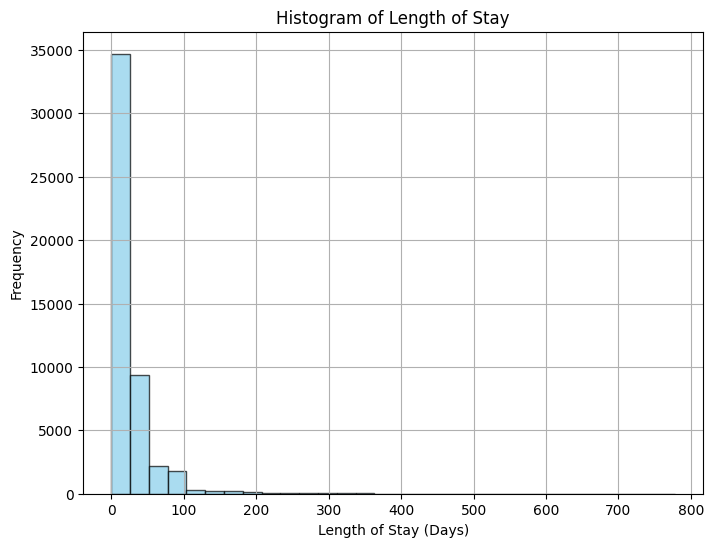

In [13]:
# Create histogram for length_of_stay
plt.figure(figsize=(8, 6))
plt.hist(df_filtered['length_of_stay'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Length of Stay')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [14]:
print('Length of Stay more than 365')
(df_filtered.length_of_stay> 365).value_counts()

Length of Stay more than 365


length_of_stay
False    49140
True        22
Name: count, dtype: int64

Let's assume that a maximum stay a customer can have is 1 year. Now, we found that there are 22 customers id having their journey greater than 1 year.

In [15]:
df_filtered[df_filtered.length_of_stay> 365].trip_type.value_counts()

trip_type
RoundTrip    22
Name: count, dtype: int64

In [16]:
df_filtered[df_filtered.length_of_stay> 365].booking_complete.value_counts()

booking_complete
0    16
1     6
Name: count, dtype: int64

Though 22 id's have booked a Roundtrip, we can see that only 6 of them have completed the booking. But keeping these 6 values and 16 in mind would make the prediction go wrong. So, we shall remove those values that are greater than 365 length of stay.

In [17]:
# Remove rows where length_of_stay is greater than 365 days
df_filtered = df_filtered[df_filtered['length_of_stay'] <= 365]

# Display the filtered DataFrame
print("Filtered DataFrame:")
df_filtered

Filtered DataFrame:


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


## 5. Flight_Day

## "Mon": 1", "Tue": 2, "Wed": 3", "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7 ##

In [19]:
df_filtered.flight_day.value_counts()

flight_day
1    7896
3    7599
2    7548
4    7359
5    6706
7    6315
6    5717
Name: count, dtype: int64

* The most travelled day is **MONDAY**
* The least traveeled day is **SATURDAY**

## 6. Booking Origin

In [22]:
df_filtered.booking_origin.value_counts()

booking_origin
Australia               17719
Malaysia                 7005
South Korea              4469
Japan                    3822
China                    3349
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

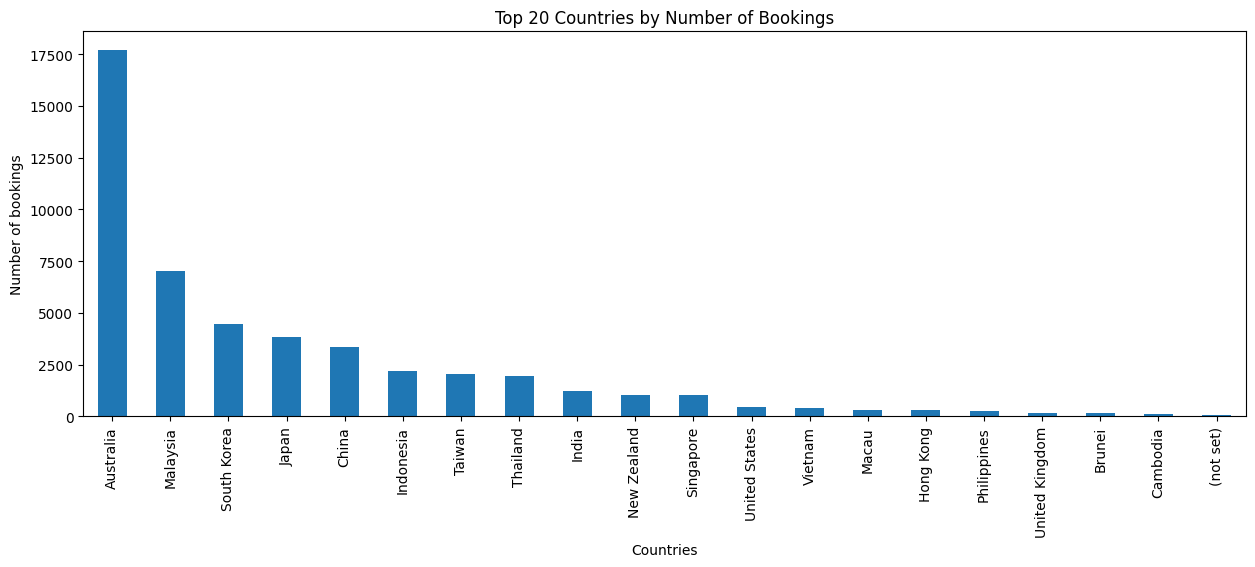

In [23]:
# Set the figure size
plt.figure(figsize=(15,5))

# Plot the bar chart
ax = df_filtered.booking_origin.value_counts()[:20].plot(kind="bar")

# Set labels for the x and y axes
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

# Set the title of the plot
plt.title("Top 20 Countries by Number of Bookings")

# Display the plot
plt.show()


The above bar chart tell us about which country has the maximum bookings, but amoung those bookings how many bookings are completed ?

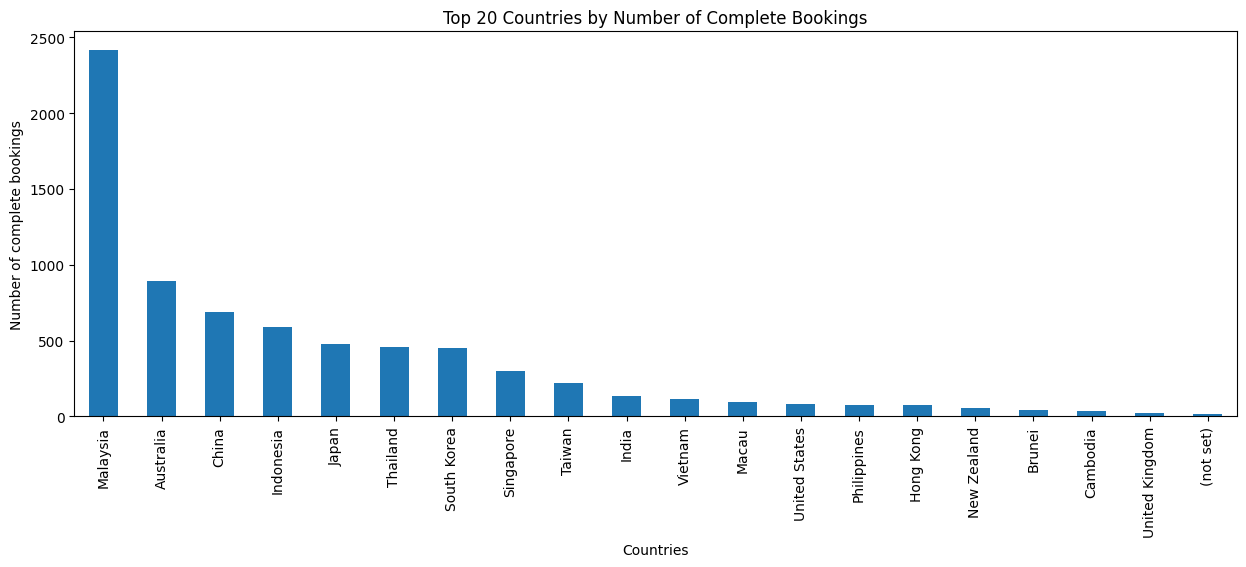

In [30]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the bar chart for complete bookings
ax = df_filtered[df_filtered.booking_complete == 1].booking_origin.value_counts()[:20].plot(kind="bar")

# Set labels for the x and y axes
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

# Set the title of the plot
plt.title("Top 20 Countries by Number of Complete Bookings")

# Display the plot
plt.show()

## 7. Booking Complete

In [34]:
# Calculate the percentage of completed bookings
percentage_completed_bookings = (df_filtered[df_filtered['booking_complete'] == 1].shape[0] / len(df)) * 100
percentage_not_completed_bookings = (df_filtered[df_filtered['booking_complete'] == 0].shape[0] / len(df)) * 100

# Print the percentage
print("Out of 49140 bookings")
print("Percentage of completed bookings:", percentage_completed_bookings, "%")
print("Percentage of not completed bookings:", percentage_not_completed_bookings, "%")

Out of 49140 bookings
Percentage of completed bookings: 14.712 %
Percentage of not completed bookings: 83.568 %


In [33]:
df_filtered

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [35]:
# Save df_filtered as a CSV file
df_filtered.to_csv('Bookings_Filtered.csv', index=False)